# SURVIVAL PREDICTION ON THE TITANIC

## Description

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Evaluation

The historical data has been split into two groups, a 'training set' and a 'test set'.  For the training set, we provide the outcome ( 'ground truth' ) for each passenger.  You will use this set to build your model to generate predictions for the test set.

For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ).  Your score is the percentage of passengers you correctly predict.

 The Kaggle leaderboard has a public and private component.  50% of your predictions for the test set have been randomly assigned to the public leaderboard ( the same 50% for all users ).  Your score on this public portion is what will appear on the leaderboard.  At the end of the contest, we will reveal your score on the private 50% of the data, which will determine the final winner.  This method prevents users from 'overfitting' to the leaderboard.

## Data Set

<pre>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</pre>

## Setup Imports and Variables

In [130]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

Read the data:

In [131]:
df_train = pd.read_csv('titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


View the data types of each column:

In [133]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, and Embarked are missing values.  Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

In [135]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now that we have a general idea of the data set contents, we can dive deeper into each column.  We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

Text(0.5, 1.0, 'Age Histogram')

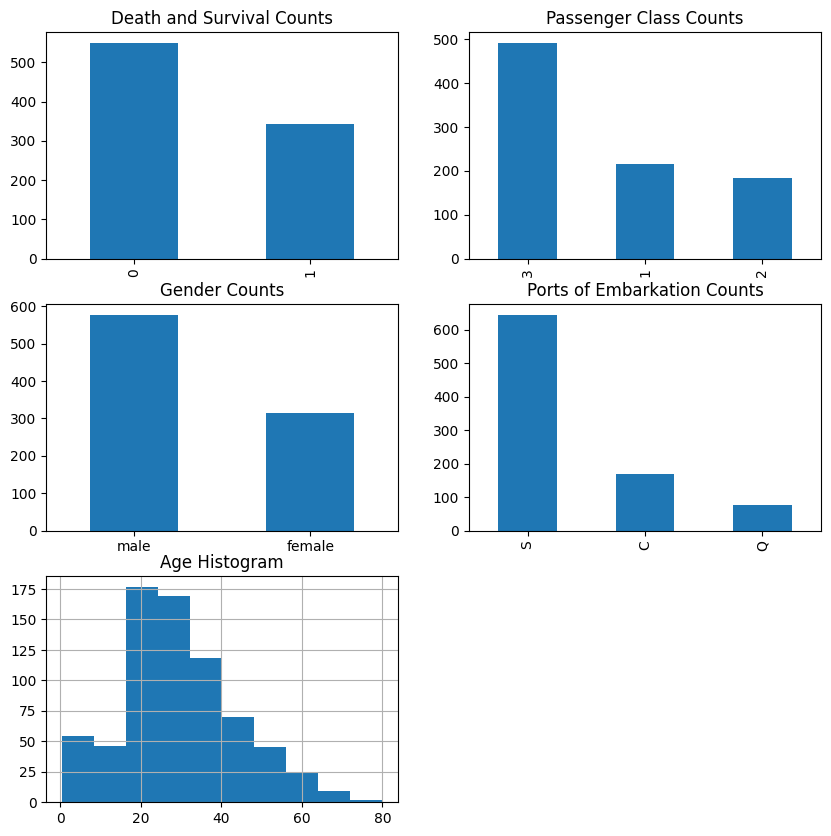

In [136]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

Next we'll explore various features to view their impact on survival rates.

## Feature: Passenger Classes

From our exploratory data analysis in the previous section, we see there are three passenger classes: First, Second, and Third class.  We'll determine which proportion of passengers survived based on their passenger class.

Generate a cross tab of Pclass and Survived:

In [137]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Plot the cross tab:

Text(0, 0.5, 'Survival Rate')

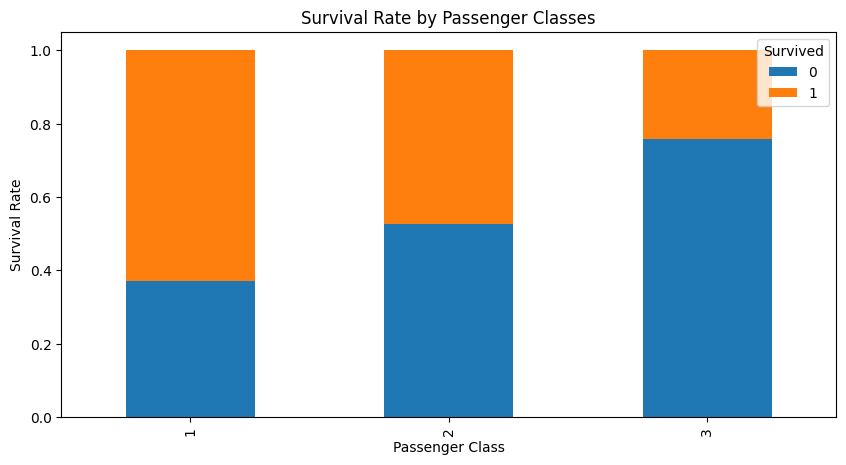

In [138]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

We can see that passenger class seems to have a significant impact on whether a passenger survived.  Those in First Class the highest chance for survival.

## Feature: Sex

Gender might have also played a role in determining a passenger's survival rate.  We'll need to map Sex from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Sex from a string to a number representation:

In [139]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

Transform Sex from a string to a number representation:

In [140]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Sex_Val and Survived:

<Axes: title={'center': 'Survival Rate by Gender'}, xlabel='Sex_Val'>

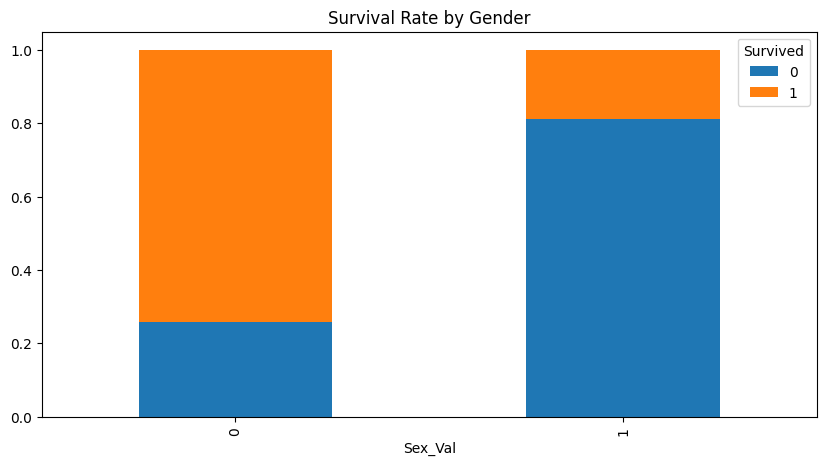

In [141]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at both Sex and Pclass.

Count males and females in each Pclass:

In [142]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & (df_train['Pclass'] == p_class)]))
    print('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & (df_train['Pclass'] == p_class)]))


M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Plot survival rate by Sex and Pclass:

Text(0, 0.5, 'Survival Rate')

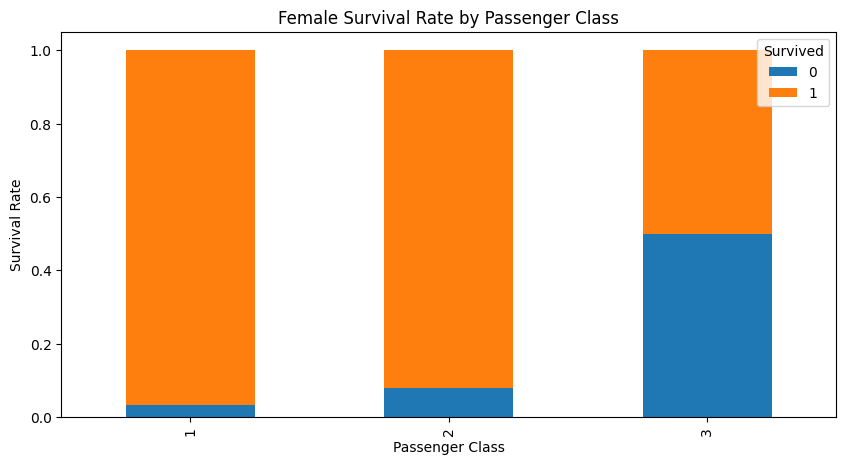

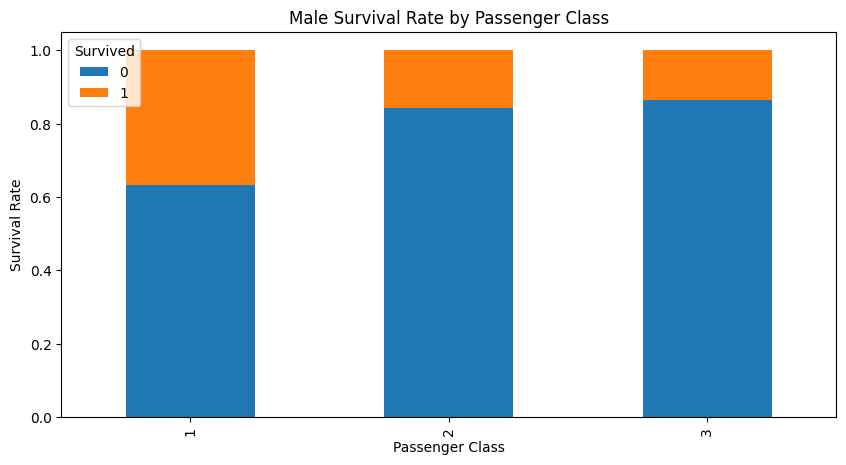

In [143]:
# Plot survival rate by Sex
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

The vast majority of females in First and Second class survived.  Males in First class had the highest chance for survival.

## Feature: Embarked

The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [144]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


Prepare to map Embarked from a string to a number representation:

In [145]:
# Get the unique values of Embarked, handling NaNs by converting to strings
embarked_locs = sorted(df_train['Embarked'].astype(str).unique())

# Create a mapping of embarked locations to numerical values
embarked_locs_mapping = {loc: idx for idx, loc in enumerate(embarked_locs)}

embarked_locs_mapping


{'C': 0, 'Q': 1, 'S': 2, 'nan': 3}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [146]:
import numpy as np

# Fill missing values in 'Embarked' column with 'Unknown'
df_train['Embarked'].fillna('Unknown', inplace=True)

# Get the unique values of Embarked
embarked_locs = sorted(df_train['Embarked'].unique())

# Create a mapping of embarked locations to numerical values
embarked_locs_mapping = {loc: idx for idx, loc in enumerate(embarked_locs)}

# Map 'Embarked' column to numerical values and cast to integer
df_train['Embarked_Val'] = df_train['Embarked'].map(embarked_locs_mapping).astype(int)


Plot the histogram for Embarked_Val:

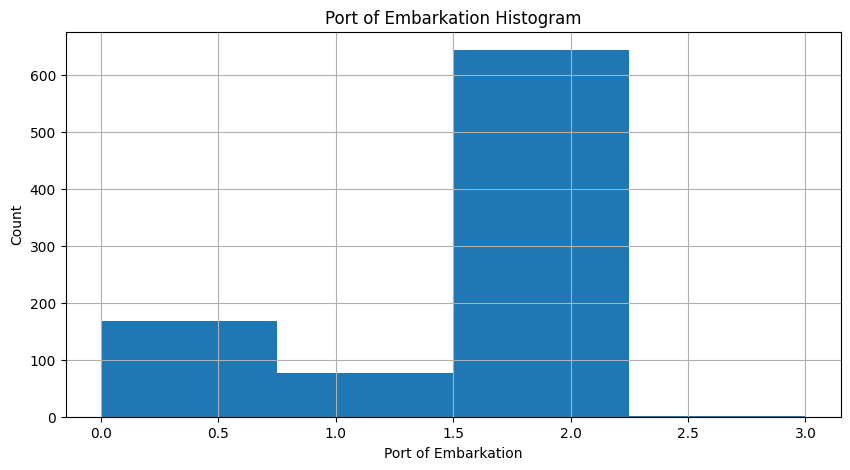

In [147]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the vast majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S': 

In [148]:
if len(df_train[df_train['Embarked'].isnull()] > 0):
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping[nan] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

Verify we do not have any more NaNs for Embarked_Val:

In [149]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2, 3]

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0, 0.5, 'Survival Rate')

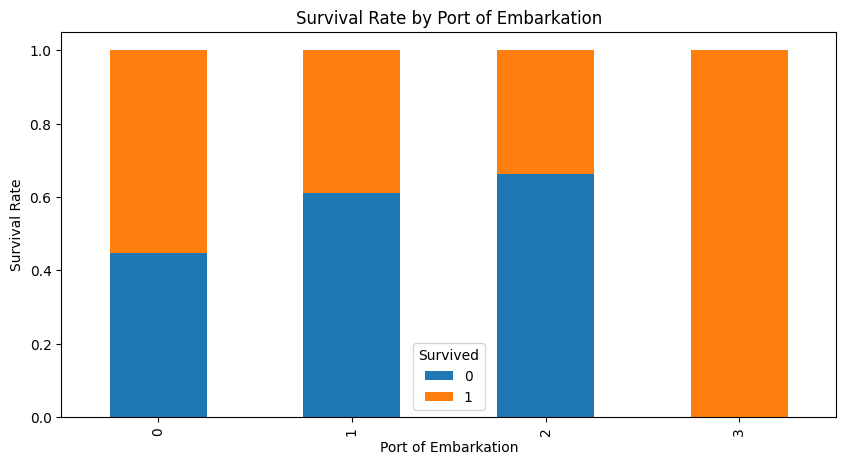

In [150]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 1 had the highest rate of survival.  We'll dig in some more to see why this might be the case.  Below we plot a graphs to determine gender and passenger class makeup for each port:

Leaving Embarked as integers implies ordering in the values, which does not exist.  Another way to represent Embarked without ordering is to create dummy variables:

In [151]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)

## Feature: Age

The Age column seems like an important feature--unfortunately it is missing many values.  We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [152]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Sex_Val.  We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [153]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

Ensure AgeFill does not contain any missing values:

In [154]:
len(df_train[df_train['AgeFill'].isnull()])

0

Plot a normalized cross tab for AgeFill and Survived:

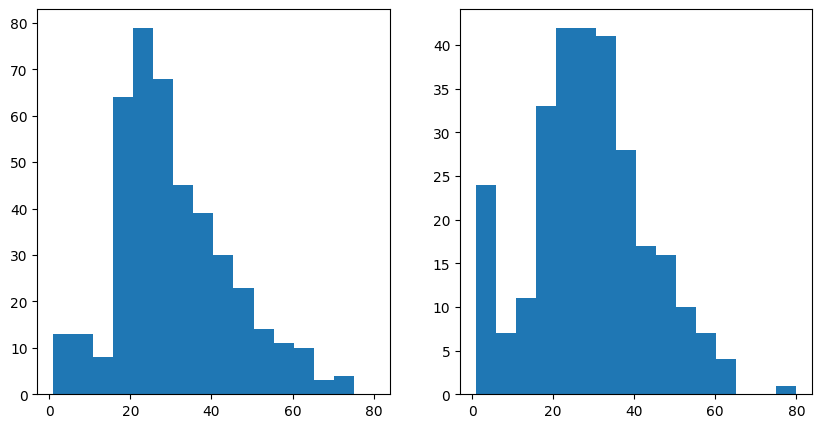

In [155]:
import matplotlib.pyplot as plt

# Assuming fig and axes are defined somewhere else
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Assuming bin_size and df1, df2 are defined somewhere else
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
bin_size = 5

# Plot histograms for both survival outcomes
axes[0].hist(df1, 
             bins=int(max_age / bin_size),  # Ensure bins is an integer
             range=(1, max_age),
             stacked=True)
axes[1].hist(df2, 
             bins=int(max_age / bin_size),  # Ensure bins is an integer
             range=(1, max_age),
             stacked=True)

plt.show()


Unfortunately, the graphs above do not seem to clearly show any insights.  We'll keep digging further.

Plot AgeFill density by Pclass:

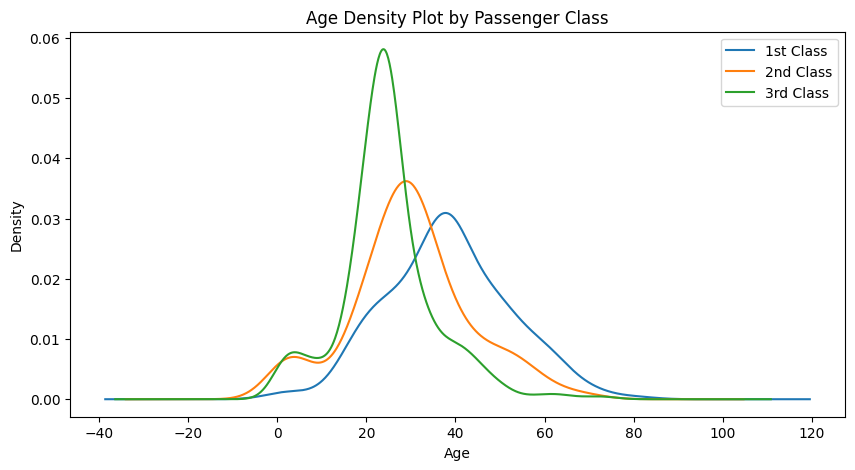

In [156]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.  We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

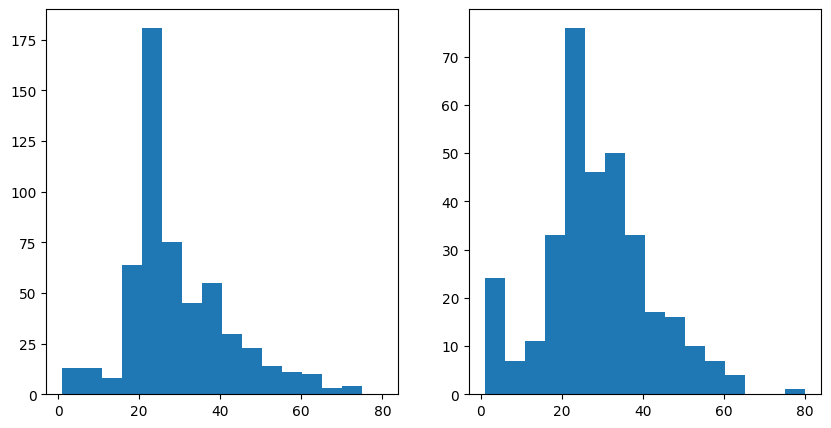

In [157]:
import matplotlib.pyplot as plt

# Assuming fig and axes are defined somewhere else
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Assuming bin_size and df1, df2 are defined somewhere else
df1 = df_train[df_train['Survived'] == 0]['AgeFill']
df2 = df_train[df_train['Survived'] == 1]['AgeFill']
max_age = max(df_train['AgeFill'])
bin_size = 5

# Plot histograms for both survival outcomes
axes[0].hist(df1, 
             bins=int(max_age // bin_size),  # Ensure bins is an integer
             range=(1, max_age))
axes[1].hist(df2, 
             bins=int(max_age // bin_size),  # Ensure bins is an integer
             range=(1, max_age))

plt.show()


In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs.  The second graph shows most females are within their 20's.  The third graph shows most first class passengers are within their 30's.

## Feature: Family Size

Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [158]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,Embarked_Val_3,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,1,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,1,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,1,0,35.0,0


Plot a histogram of FamilySize:

Text(0.5, 1.0, 'Family Size Histogram')

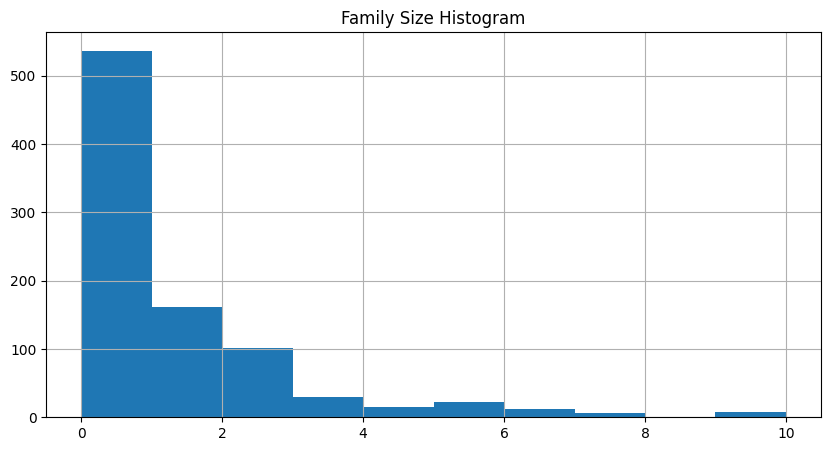

In [159]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Plot a histogram of AgeFill segmented by Survived:

Text(0.5, 1.0, 'Survivors by Family Size')

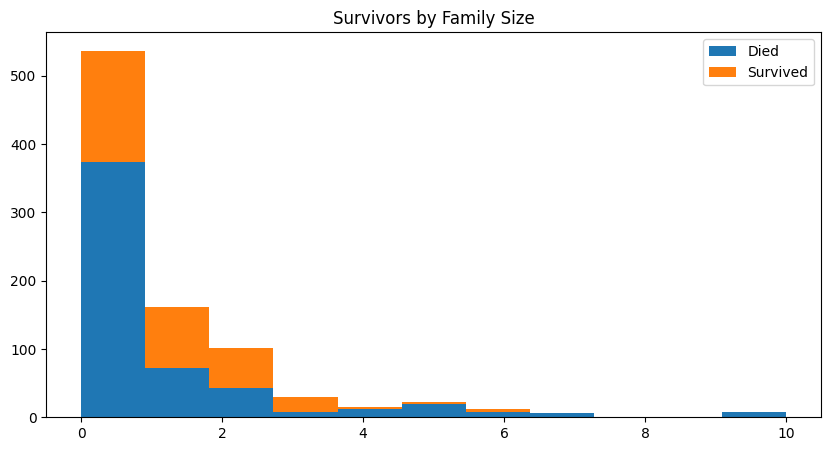

In [160]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Based on the histograms, it is not immediately obvious what impact FamilySize has on survival.  The machine learning algorithms might benefit from this feature.

Additional features we might want to engineer might be related to the Name column, for example honorrary or pedestrian titles might give clues and better predictive power for a male's survival.

## Final Data Preparation for Machine Learning

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [161]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Drop the columns we won't use:

In [162]:
df_train = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], 
                         axis=1)

Drop the following columns:
* The Age column since we will be using the AgeFill column instead.
* The SibSp and Parch columns since we will be using FamilySize instead.
* The PassengerId column since it won't be used as a feature.
* The Embarked_Val as we decided to use dummy variables instead.

In [163]:
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int64
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
Embarked_Val_3      uint8
AgeFill           float64
FamilySize          int64
dtype: object

Convert the DataFrame to a numpy array:

In [164]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  0.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  0.    , 32.    ,  0.    ]])

## Data Wrangling Summary

Below is a summary of the data wrangling we performed on our training data set.  We encapsulate this in a function since we'll need to do the same operations to our test set later.

In [165]:
def clean_data(df, drop_passenger_id):
    
    # Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

    # Transform Sex from a string to a number representation
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    
    # Get the unique values of Embarked
    embarked_locs = sorted(df['Embarked'].unique())

    # Generate a mapping of Embarked from a string to a number representation        
    embarked_locs_mapping = dict(zip(embarked_locs, 
                                     range(0, len(embarked_locs) + 1)))
    
    # Transform Embarked from a string to dummy variables
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    # Fill in missing values of Embarked
    # Since the vast majority of passengers embarked in 'S': 3, 
    # we assign the missing values in Embarked to 'S':
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked_Val' : 
                       { embarked_locs_mapping[nan] : embarked_locs_mapping['S'] 
                       }
                   }, 
                   inplace=True)
    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()] > 0):
        avg_fare = df['Fare'].mean()
        df.replace({ None: avg_fare }, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

## Random Forest: Training

Create the random forest object:

In [166]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

Fit the training data and create the decision trees:

In [167]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

## Random Forest: Predicting

Read the test data:

In [168]:
df_test = pd.read_csv('titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Note the test data does not contain the column 'Survived', we'll use our trained model to predict these values.

In [169]:
def clean_data(df, drop_passenger_id=False):
    # Fill missing values in 'Age' with median age
    df['AgeFill'] = df['Age']
    df['AgeFill'].fillna(df['Age'].median(), inplace=True)

    # Convert 'Sex' to a numerical value
    df['Sex_Val'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

    # Fill missing values in 'Fare' with the average Fare
    if df['Fare'].isnull().any():
        avg_fare = df['Fare'].mean()
        df['Fare'].fillna(avg_fare, inplace=True)

    # Drop unnecessary columns
    if drop_passenger_id:
        df.drop(['PassengerId'], axis=1, inplace=True)

    return df

# Assuming the above function is defined, you can now call it to clean the test data
df_test = clean_data(df_test, drop_passenger_id=False)

# Convert the cleaned DataFrame to a NumPy array
test_data = df_test.values




In [170]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming you have your test data in df_test
df = pd.DataFrame(df_test)

# Check for missing values
print(df.isnull().sum())
print(df.shape)

# Impute missing values in 'Age' with the mean (adjust strategy as needed)
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])  # Impute only the 'Age' column

# Drop unnecessary columns
df.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

# Handle categorical features
categorical_cols = ['Sex', 'Embarked']  # Assuming these are categorical
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Convert to strings for one-hot encoding

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Consider dropping 'PassengerId' if it's not a feature (optional)
df.drop(['PassengerId','Age'], axis=1, inplace=True)  # Adjust if needed

# Print the DataFrame after preprocessing
print(df)

# Assign data to test_x for prediction
test_x = df
print(test_x.shape)
# Assuming you have a trained model clf
test_y = clf.predict(test_x)
print(test_y)
print(test_y)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeFill          0
Sex_Val          0
dtype: int64
(418, 13)
     Pclass  SibSp  Parch      Fare  AgeFill  Sex_Val  Sex_male  Embarked_Q  \
0         3      0      0    7.8292     34.5        1         1           1   
1         3      1      0    7.0000     47.0        0         0           0   
2         2      0      0    9.6875     62.0        1         1           1   
3         3      0      0    8.6625     27.0        1         1           0   
4         3      1      1   12.2875     22.0        0         0           0   
..      ...    ...    ...       ...      ...      ...       ...         ...   
413       3      0      0    8.0500     27.0        1         1           0   
414       1      0      0  108.9000     39.0        0         0           0   
415       3      0 

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Take the decision trees and run it on the test data:

## Random Forest: Prepare for Kaggle Submission

Create a DataFrame by combining the index from the test data with the output of predictions, then write the results to the output:

In [171]:
df_test['Survived'] = test_y
df_test[['PassengerId', 'Survived']] \
    .to_csv('titanic/results-rf.csv', index=False)

## Evaluate Model Accuracy

Submitting to Kaggle will give you an accuracy score.  It would be helpful to get an idea of accuracy without submitting to Kaggle.

We'll split our training data, 80% will go to "train" and 20% will go to "test":

In [172]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 9) (891,)
(712, 9) (712,)
(179, 9) (179,)


Use the new training data to fit the model, predict, and get the accuracy score:

In [173]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.84


View the Confusion Matrix:

|      | condition True | condition false|
|------|----------------|---------------|
|prediction true|True Positive|False positive|
|Prediction False|False Negative|True Negative|

Get the model score and confusion matrix:

In [174]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.84 

Confusion Matrix  [[101   9]
 [ 19  50]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 101 |   9 |
Actual   |-----|-----|
       1 |  19 |  50 |
         |-----|-----|


Display the classification report:

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [175]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.92      0.88       110
    Survived       0.85      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



## SIMPLE LINEAR REGRESSION

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df2='titanic/train.csv'
df2=pd.read_csv(df2)
imputer = SimpleImputer(strategy='mean')
df2['Age'] = imputer.fit_transform(df2[['Age']])

# Assuming you have your data in a DataFrame named 'df'
# Separate features (age) and target variable (survival)
features = df2[['Age']]  # Assuming 'Age' is the feature for prediction
target = df2['Survived']  # Assuming 'Survived' is the target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Simple Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_predicted = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("Mean Squared Error:", mse)
print("R-squared (score):", r2)  # Print the R-squared score directly

# (Optional) Get coefficients and intercept
coefficients = model.coef_[0]  # Coefficient for 'Age'
intercept = model.intercept_

print("Coefficient for Age:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 0.24124544121460198
R-squared (score): 0.005180800262926333
Coefficient for Age: -0.002050972718648854
Intercept: 0.43698658879378494


## MULTIPLE LINEAR REGRESSION

In [177]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(train_x, train_y)

predicted_y = model.predict(test_x)  # Replace test_x with your actual test data

# Get coefficients (weights)
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# (Optional) Evaluate model performance metrics (e.g., R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(test_y, predicted_y)
print("R-squared:", r2)


Coefficients: [-1.77113964e-01  2.93830272e-04 -5.03498414e-01 -2.51321645e-02
 -8.77647157e-03 -6.59357263e-02  9.98443623e-02 -6.90542036e-03
 -3.46759181e-02]
Intercept: 1.3990341971787421
R-squared: 0.4255215316888752


In [178]:
print("Accuracy of the MODEL:",model.score(test_x,test_y)*100,"%")

Accuracy of the MODEL: 42.55215316888752 %


### Accuracy of the model is low

### Calculating MSE and MAE

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have predicted values (replace with actual predictions)
predicted_y = model.predict(train_x)  # Use test data for actual evaluation

# Calculate MAE and MSE
mae = mean_absolute_error(train_y, predicted_y)
mse = mean_squared_error(train_y, predicted_y)

# Print the MAE and MSE scores
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 0.29628624557878747
Mean Squared Error: 0.1438075512557154


## NAIVE BAYES MODEL

In [180]:
from sklearn.naive_bayes import GaussianNB

# Assuming you have your train_x and train_y prepared

# Create a Naive Bayes model
model = GaussianNB()

# Fit the model to the training data
model.fit(train_x, train_y)

# Make predictions on the test data
test_y_predicted = model.predict(test_x)

# Print the predicted labels
#print("Predicted labels:", test_y_predicted)

# (Optional) Evaluate model performance metrics (e.g., accuracy)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, test_y_predicted)
print("Accuracy:", accuracy)


Accuracy: 0.6927374301675978


### Accuracy of the model is 0.69


## LOGISTIC REGRESSION

In [181]:
from sklearn.linear_model import LogisticRegression

# Assuming you have your train_x and train_y prepared

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(train_x, train_y)

# Make predictions on the test data
test_y_predicted = model.predict(test_x)

# Print the predicted labels
print("Predicted labels:", test_y_predicted)

# (Optional) Evaluate model performance metrics (e.g., accuracy)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, test_y_predicted)
print("Accuracy:", accuracy)

# (Optional) Get classification probabilities (optional)
test_y_proba = model.predict_proba(test_x)
print("Predicted probabilities:", test_y_proba)


Predicted labels: [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
Accuracy: 0.8100558659217877
Predicted probabilities: [[0.84664852 0.15335148]
 [0.87911225 0.12088775]
 [0.88806974 0.11193026]
 [0.07030662 0.92969338]
 [0.45492499 0.54507501]
 [0.61202162 0.38797838]
 [0.08591829 0.91408171]
 [0.09138809 0.90861191]
 [0.41487856 0.58512144]
 [0.27725954 0.72274046]
 [0.90588187 0.09411813]
 [0.27255365 0.72744635]
 [0.84473842 0.15526158]
 [0.1257636  0.8742364 ]
 [0.0414457  0.9585543 ]
 [0.265

/Users/rr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


### Accuracy of the model is 81%


## SUPPORT VECTOR MACHINE

In [183]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your train_x, train_y, test_x, and test_y prepared

# Create a Support Vector Machine model (SVC)
model = SVC()  # Use default linear kernel for initial test

# Fit the model to the training data
model.fit(train_x, train_y)

# Make predictions on the test data
test_y_predicted = model.predict(test_x)

# Evaluate model performance
accuracy = accuracy_score(test_y, test_y_predicted)
print("Accuracy:", accuracy)


Accuracy: 0.7262569832402235


### Accuracy of the model is 73%

In [184]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your train_x, train_y, test_x, and test_y prepared

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the training features
train_x_scaled = scaler.fit_transform(train_x)

# Scale the test features (using the same scaler fit on training data)
test_x_scaled = scaler.transform(test_x)

# Create a Support Vector Machine model (SVC)
model = SVC()  # Use default linear kernel for initial test

# Fit the model to the scaled training data
model.fit(train_x_scaled, train_y)

# Make predictions on the scaled test data
test_y_predicted = model.predict(test_x_scaled)

# Evaluate model performance
accuracy = accuracy_score(test_y, test_y_predicted)
print("Accuracy:", accuracy)



Accuracy: 0.7988826815642458


### Accuracy of the model after applying Standard Scaler function is 80%



## DECISION TREE

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your train_x, train_y, test_x, and test_y prepared

# Create a Decision Tree Classifier model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(train_x, train_y)

# Make predictions on the test data
test_y_predicted = model.predict(test_x)

# Evaluate model performance
accuracy = accuracy_score(test_y, test_y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


### Accuracy of the model is 80%





## K-MEANS CLUSTERING

In [186]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # Optional for scaling features

# Assuming you have your train_x data prepared

# Optional: Standardize features (if features have different ranges)
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)

# Create a KMeans model (experiment with different k values)
model = KMeans(n_clusters=3, random_state=42)  # Adjust 'n_clusters' for desired number of groups

# Fit the model to the data (scaled or original)
model.fit(train_x_scaled if scaler else train_x)

# Get cluster assignments for each data point
cluster_labels = model.predict(train_x_scaled if scaler else train_x)

# Print cluster assignments (sample data points)
print("Sample cluster assignments:", cluster_labels[:10])  # Print labels for first 10 data points


Sample cluster assignments: [2 1 2 2 1 1 1 0 1 1]


#### Metric Evaluation

In [187]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_y, test_y_predicted)
recall = recall_score(test_y, test_y_predicted)
f1 = f1_score(test_y, test_y_predicted)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.7868852459016393
Recall: 0.6956521739130435
F1-score: 0.7384615384615385


## HIERARCHICAL CLUSTERING

In [188]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming you have your train_x data prepared

# Create a Hierarchical Clustering model (AgglomerativeClustering)
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Adjust 'n_clusters' for desired hierarchy

# Fit the model to the data
model.fit(train_x)

# Get cluster assignments for each data point
cluster_labels = model.labels_


print("Sample cluster assignments:", cluster_labels[:10])  # Print labels for first 10 data points




Sample cluster assignments: [2 2 2 2 2 2 2 2 2 2]


# ACCURACY OF EACH MODEL

#### Logistic Regression: 
	Accuracy: 81%
####  Decision Tree
	Accuracy: 80%
####  Support Vector Machine
	Accuracy: 80%
####  Simple Linear Regression
	Accuracy: Low
####  Multiple Linear Regression
	Accuracy: Low
#### Hierarchial Clustering
#### K-Means Clustering
#### Naïve Bayes
 	Accuracy: 69%
#### Random Forest
	Accuracy: 84%


### After performing all algorithms we can say that, the best possible model for us to apply is Random Forest Algorithm as it provides the best accuracy
### It provides an accuracy of 87%

# RANDOM FOREST 
# ACCURACY : 84%